In [35]:
# Import the necesssary packages
import numpy as np
from matplotlib import pyplot as plt
import yroots as yr
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline
plt.rcParams["figure.dpi"] = 600            # Fix plot quality.
plt.rcParams["figure.figsize"] = (6.5,3)

import warnings
warnings.filterwarnings("ignore")

# Chebfun Test Suite Examples

## YRoots correctly identifies two roots near the origin.

The system 
$$f(x,y) = (y - 2x)(y + \frac{1}{2}x)$$
$$g(x,y) = (x - 0.0001)(x^{2} + y^{2} - 1)$$

has exactly 6 roots. YRoots correctly identfies the number of roots, including the two very close to the origin when searching on the interval $[-1,-1] \times [1,1]$ at $(0.0001, -0.0005)$ and $(0.0001, 0.005)$.

Percent Finished: 100%                                                  
Total intervals checked was 1
Methods used were ['constant_term_check', 'quadratic_check', 'Base Case', 'Moller-Stetter', 'Too Deep']
The percent solved by each was [  0.   0.   0. 100.   0.]


<Figure size 3900x1800 with 0 Axes>

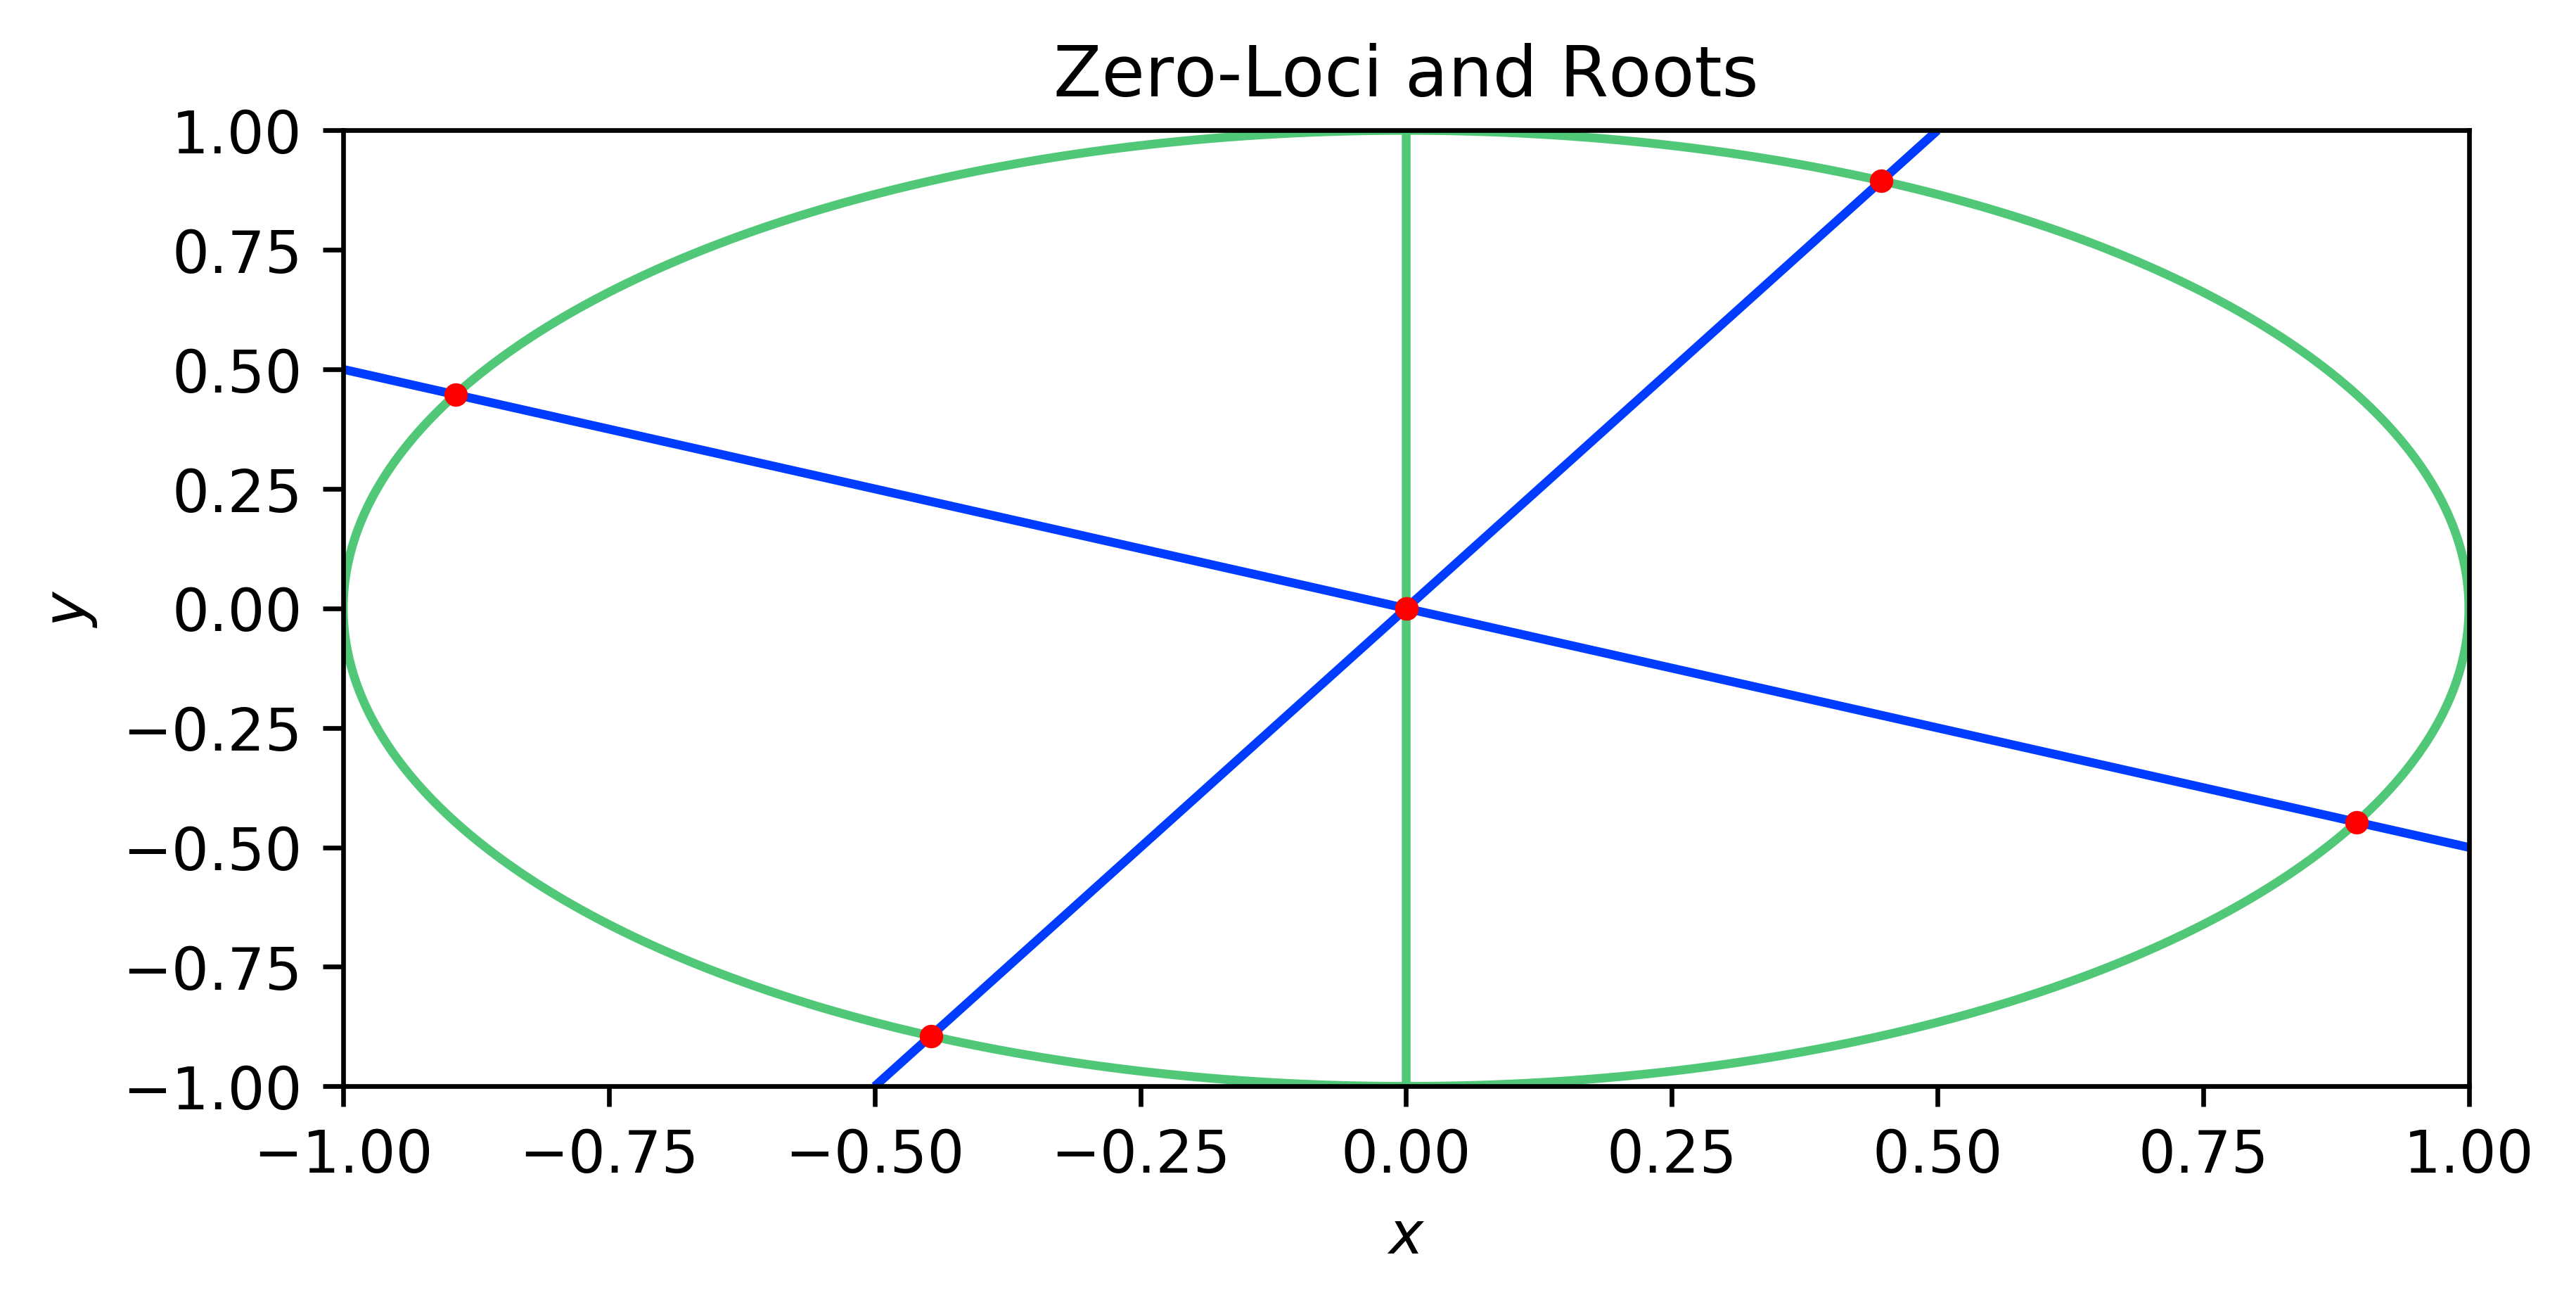

Max residual for f: 3.475547814546188e-15
Max residual for g: 2.5815468613907642e-15


In [36]:
f = lambda x,y: (y - 2*x)*(y+.5*x)
g = lambda x,y: (x-.0001)*(x**2+y**2-1)
yroots = yr.solve([f,g],[-1,-1],[1,1], plot=True)
chebfun_roots = np.loadtxt('tests/chebfun_test_output/cftest6_2.csv', delimiter=',')
actual_roots = np.array([[1/10000,-1/20000],[1/10000, 1/5000],
                         [-2/np.sqrt(5),1/np.sqrt(5)],[-1/np.sqrt(5),-2/np.sqrt(5)],
                         [1/np.sqrt(5),2/np.sqrt(5)],[2/np.sqrt(5),-1/np.sqrt(5)]])

print("Max residual for f:", max([f(*x) for x in yroots]))
print("Max residual for g:", max([g(*x) for x in yroots]))

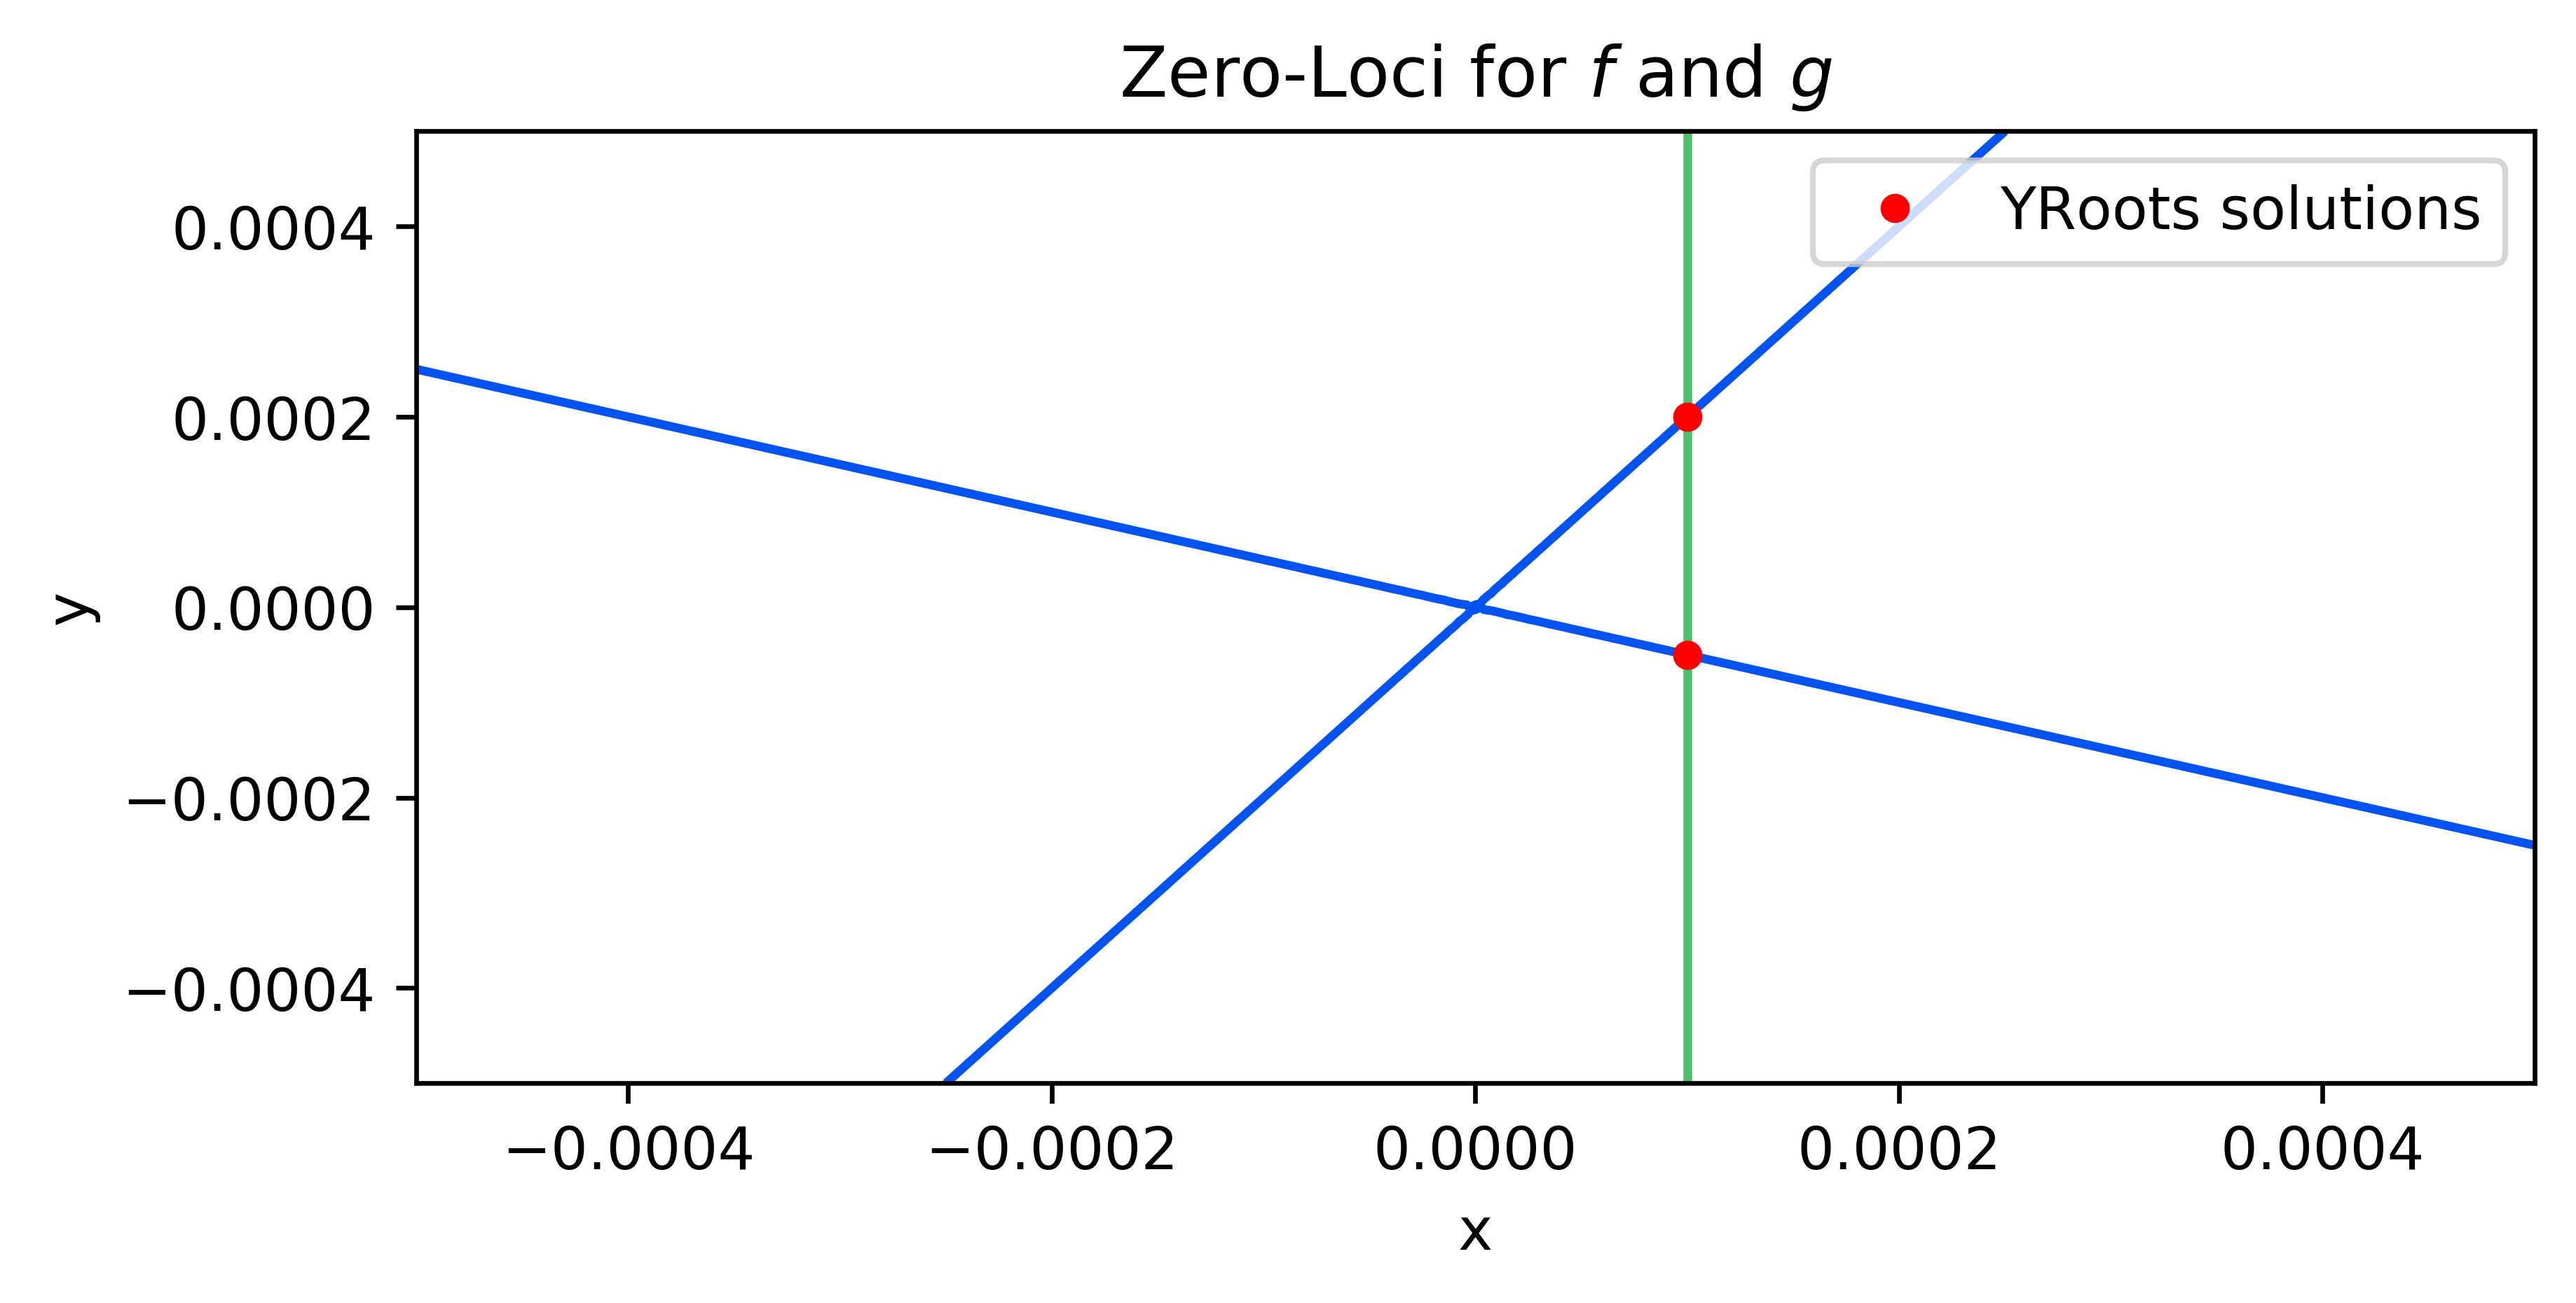

In [32]:
# Plot a small region near the origin
x = np.linspace(-0.0005, 0.0005, 200)
X,Y = np.meshgrid(x,x)
plt.contour(X, Y, f(X,Y), 0, colors=(5/255, 84/255, 242/255))
plt.contour(X, Y, g(X,Y), 0, colors=(78/255, 191/255, 107/255))
plt.xlabel('x')
plt.ylabel('y')
plt.title(r'Zero-Loci for $f$ and $g$')

plt.plot(yroots[3:5,0], yroots[3:5,1], '.', color='r', ms='8', label='YRoots solutions')
plt.legend()

plt.show()


## Sometimes, there are boundary problems

Percent Finished: 100%                                                  
Total intervals checked was 904
Methods used were ['constant_term_check', 'quadratic_check', 'Base Case', 'Moller-Stetter', 'Too Deep']
The percent solved by each was [ 9.4027 88.8274  1.6593  0.1106  0.    ]


<Figure size 3900x1800 with 0 Axes>

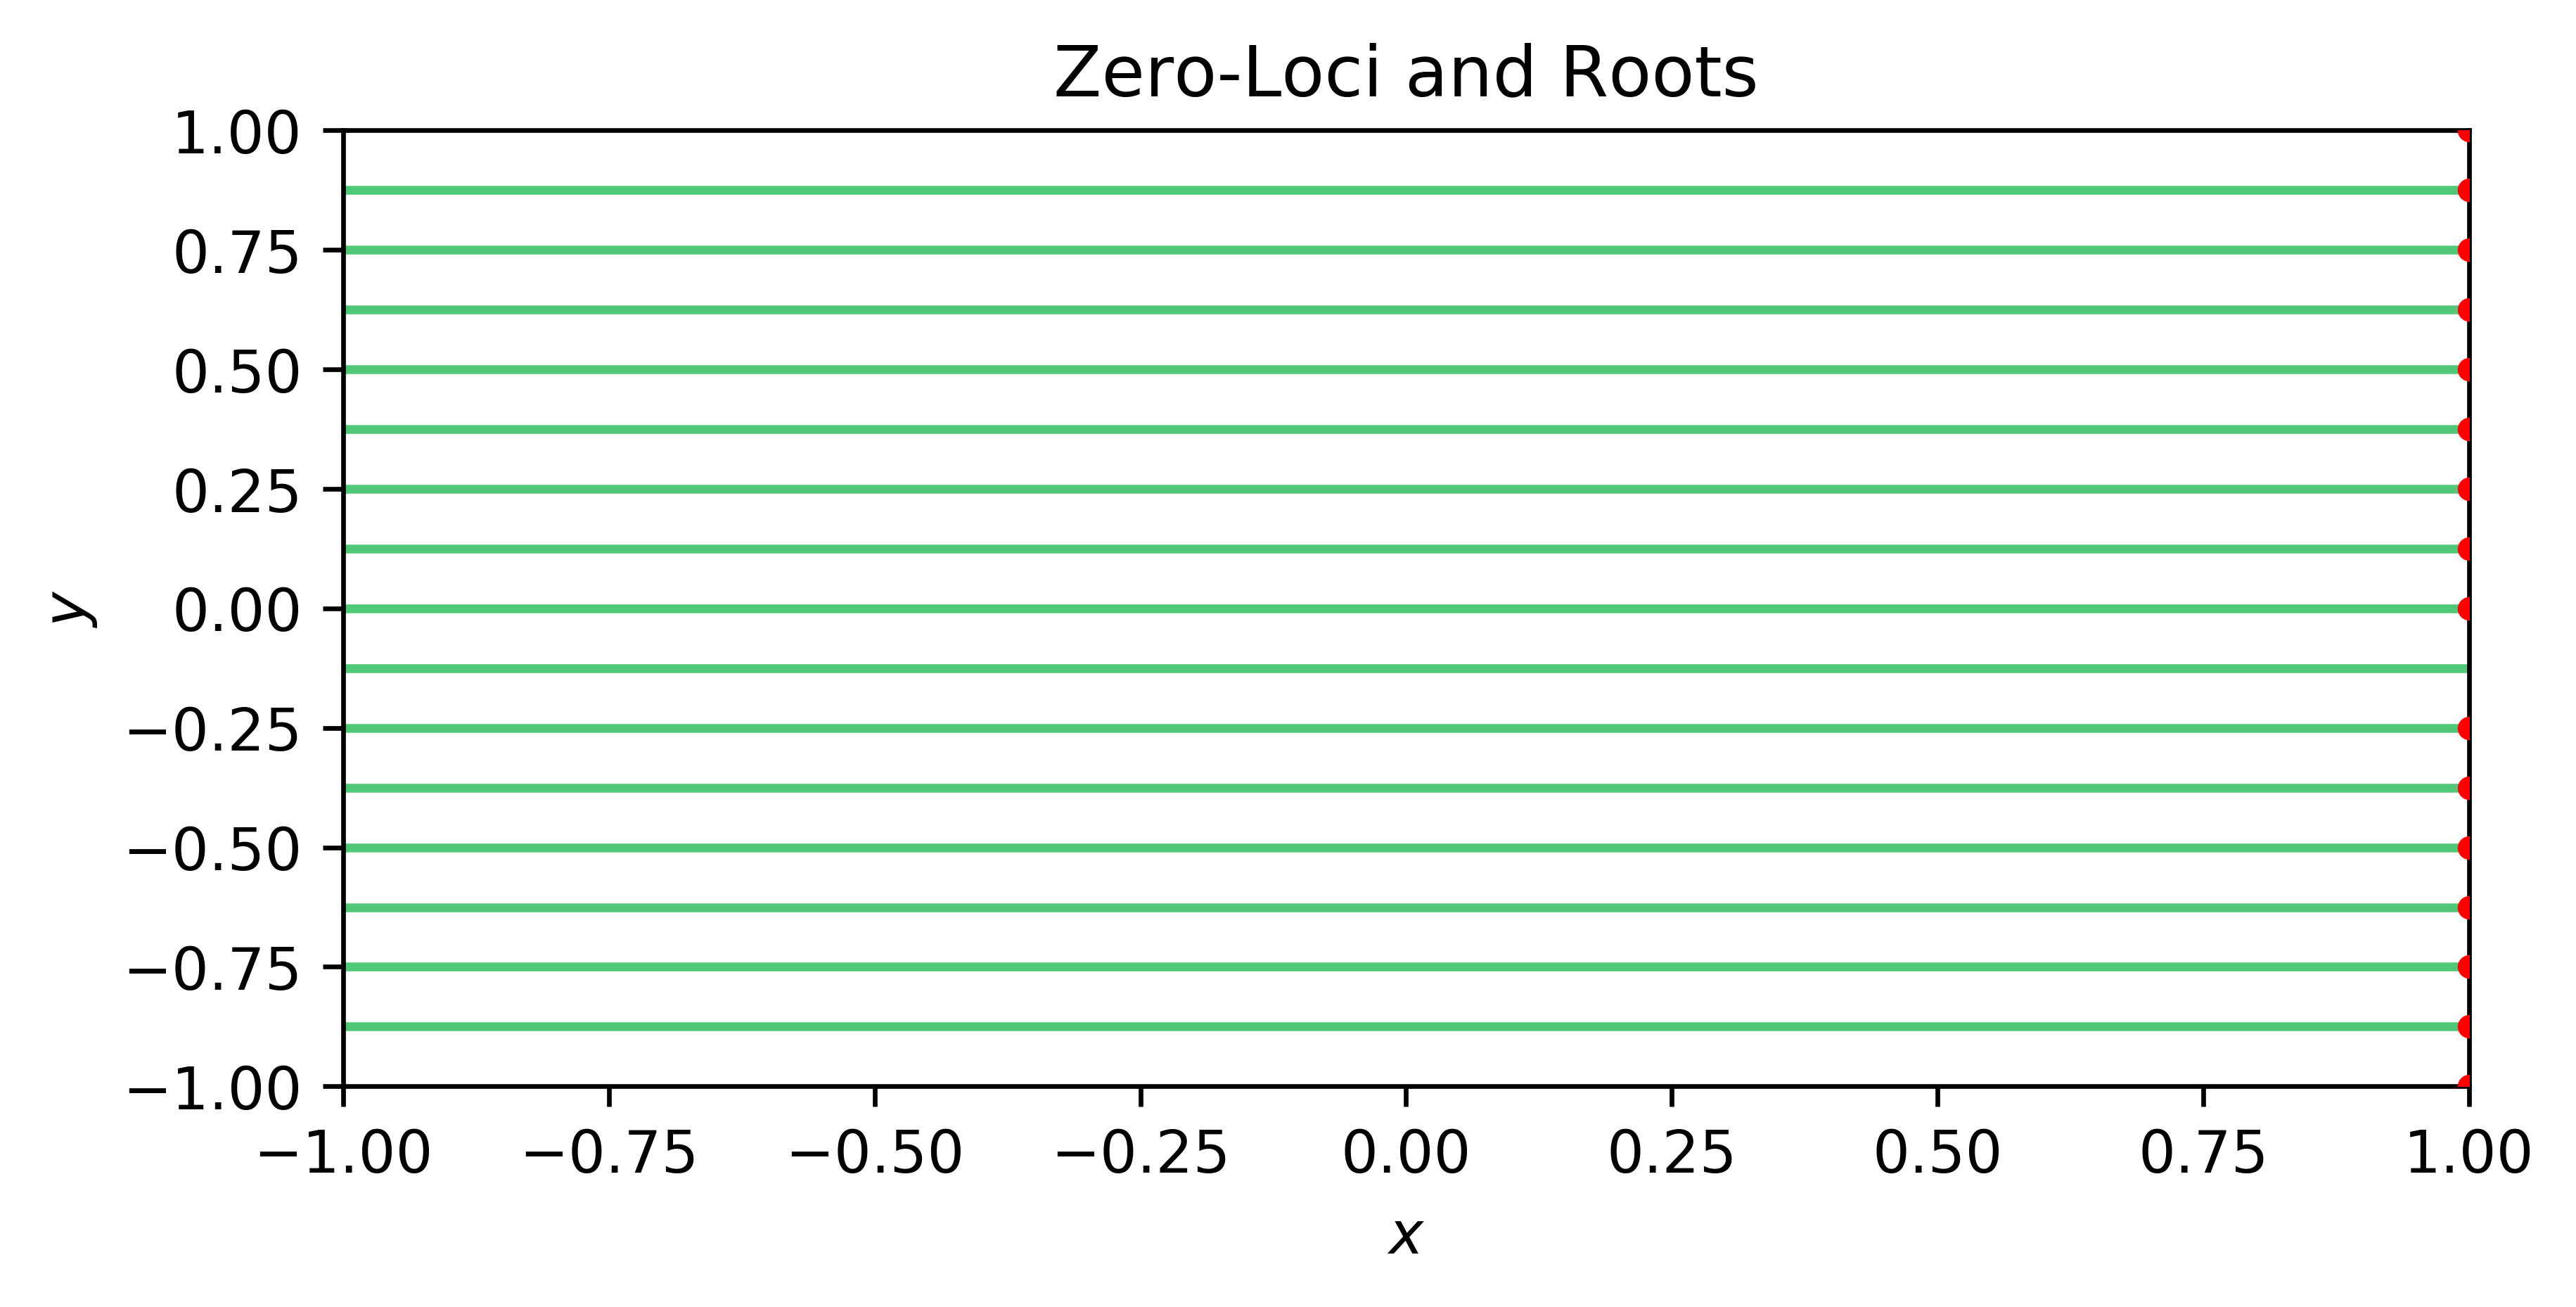

In [33]:
# Test 10.1
f = lambda x,y: (x-1)*(np.cos(x*y**2)+2)
g = lambda x,y: np.sin(8*np.pi*y)*(np.cos(x*y)+2)
yroots = yr.solve([f,g],[-1,-1],[1,1], plot=True)

Percent Finished: 100%                                                  
Total intervals checked was 949
Methods used were ['constant_term_check', 'quadratic_check', 'Base Case', 'Moller-Stetter', 'Too Deep']
The percent solved by each was [ 8.9568 89.2518  1.7914  0.      0.    ]


<Figure size 3900x1800 with 0 Axes>

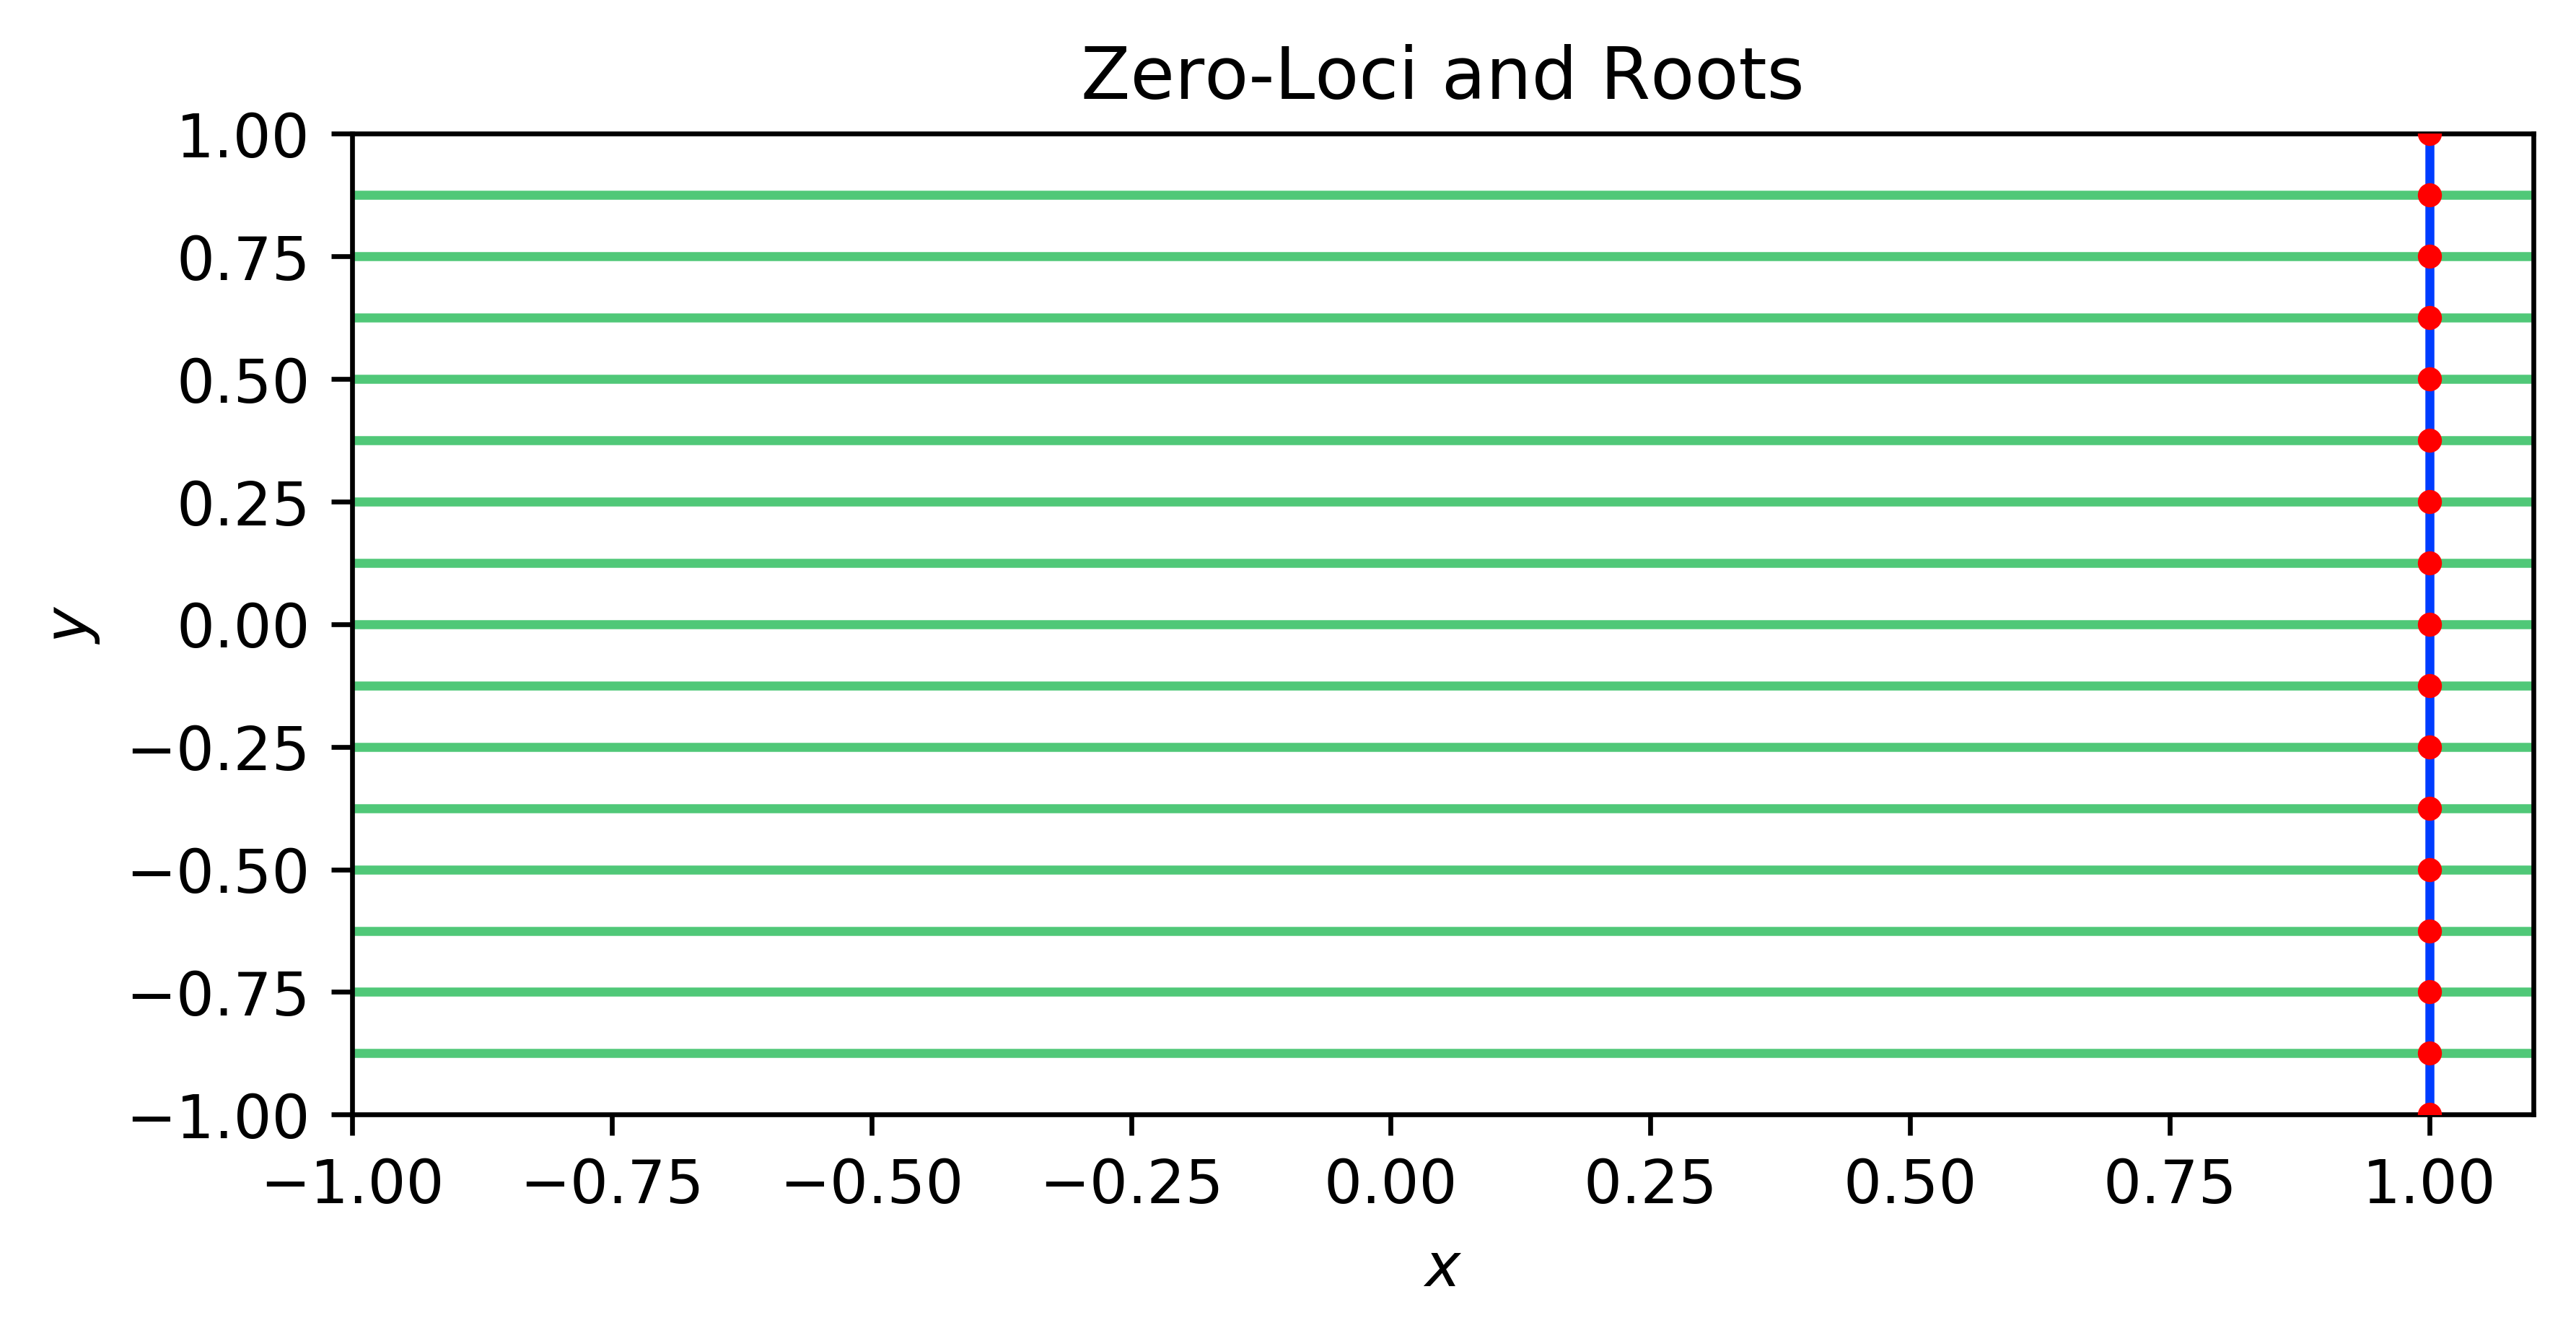

In [34]:
# Test 10.1
yroots = yr.solve([f,g],[-1,-1],[1.1,1], plot=True)

# Unoptimized, large polynomial evaulation with good speed
## Degree 18 Bivariate Polynomial

In [9]:
# Test 4.2
f = lambda x,y: ((90000*y**10 + (-1440000)*y**9 + (360000*x**4 + 720000*x**3 + 504400*x**2 + 144400*x + 9971200)*(y**8) + 
            ((-4680000)*x**4 + (-9360000)*x**3 + (-6412800)*x**2 + (-1732800)*x + (-39554400))*(y**7) + (540000*x**8 + 
            2160000*x**7 + 3817600*x**6 + 3892800*x**5 + 27577600*x**4 + 51187200*x**3 + 34257600*x**2 + 8952800*x + 100084400)*(y**6) + 
            ((-5400000)*x**8 + (-21600000)*x**7 + (-37598400)*x**6 + (-37195200)*x**5 + (-95198400)*x**4 + 
            (-153604800)*x**3 + (-100484000)*x**2 + (-26280800)*x + (-169378400))*(y**5) + (360000*x**12 + 2160000*x**11 + 
            6266400*x**10 + 11532000*x**9 + 34831200*x**8 + 93892800*x**7 + 148644800*x**6 + 141984000*x**5 + 206976800*x**4 + 
            275671200*x**3 + 176534800*x**2 + 48374000*x + 194042000)*(y**4) + ((-2520000)*x**12 + (-15120000)*x**11 + (-42998400)*x**10 + 
            (-76392000)*x**9 + (-128887200)*x**8 + (-223516800)*x**7 + (-300675200)*x**6 + (-274243200)*x**5 + (-284547200)*x**4 + 
            (-303168000)*x**3 + (-190283200)*x**2 + (-57471200)*x + (-147677600))*(y**3) + (90000*x**16 + 720000*x**15 + 3097600*x**14 + 
            9083200*x**13 + 23934400*x**12 + 58284800*x**11 + 117148800*x**10 + 182149600*x**9 + 241101600*x**8 + 295968000*x**7 + 
            320782400*x**6 + 276224000*x**5 + 236601600*x**4 + 200510400*x**3 + 123359200*x**2 + 43175600*x + 70248800)*(y**2) + 
            ((-360000)*x**16 + (-2880000)*x**15 + (-11812800)*x**14 + (-32289600)*x**13 + (-66043200)*x**12 + (-107534400)*x**11 + 
            (-148807200)*x**10 + (-184672800)*x**9 + (-205771200)*x**8 + (-196425600)*x**7 + (-166587200)*x**6 + (-135043200)*x**5 + 
            (-107568800)*x**4 + (-73394400)*x**3 + (-44061600)*x**2 + (-18772000)*x + (-17896000))*y + (144400*x**18 + 1299600*x**17 + 
            5269600*x**16 + 12699200*x**15 + 21632000*x**14 + 32289600*x**13 + 48149600*x**12 + 63997600*x**11 + 67834400*x**10 + 
            61884000*x**9 + 55708800*x**8 + 45478400*x**7 + 32775200*x**6 + 26766400*x**5 + 21309200*x**4 + 11185200*x**3 + 6242400*x**2 + 
            3465600*x + 1708800)))
g = lambda x,y: 1e-4*(y**7 + (-3)*y**6 + (2*x**2 + (-1)*x + 2)*y**5 + (x**3 + (-6)*x**2 + x + 2)*y**4 + (x**4 + (-2)*x**3 + 2*x**2 + 
            x + (-3))*y**3 + (2*x**5 + (-3)*x**4 + x**3 + 10*x**2 + (-1)*x + 1)*y**2 + ((-1)*x**5 + 3*x**4 + 4*x**3 + (-12)*x**2)*y + 
            (x**7 + (-3)*x**5 + (-1)*x**4 + (-4)*x**3 + 4*x**2))
%time yroots = yr.solve([f,g],[-1,-1],[1,1], check_eval_error=False)


Percent Finished: 100%                                                  
Total intervals checked was 319
Methods used were ['constant_term_check', 'quadratic_check', 'Base Case', 'Moller-Stetter', 'Too Deep']
The percent solved by each was [10.9718 87.7743  0.      1.2539  0.    ]
CPU times: user 740 ms, sys: 4.03 ms, total: 744 ms
Wall time: 744 ms


Percent Finished: 100%                                                  
Total intervals checked was 319
Methods used were ['constant_term_check', 'quadratic_check', 'Base Case', 'Moller-Stetter', 'Too Deep']
The percent solved by each was [10.9718 87.7743  0.      1.2539  0.    ]


<Figure size 3900x1800 with 0 Axes>

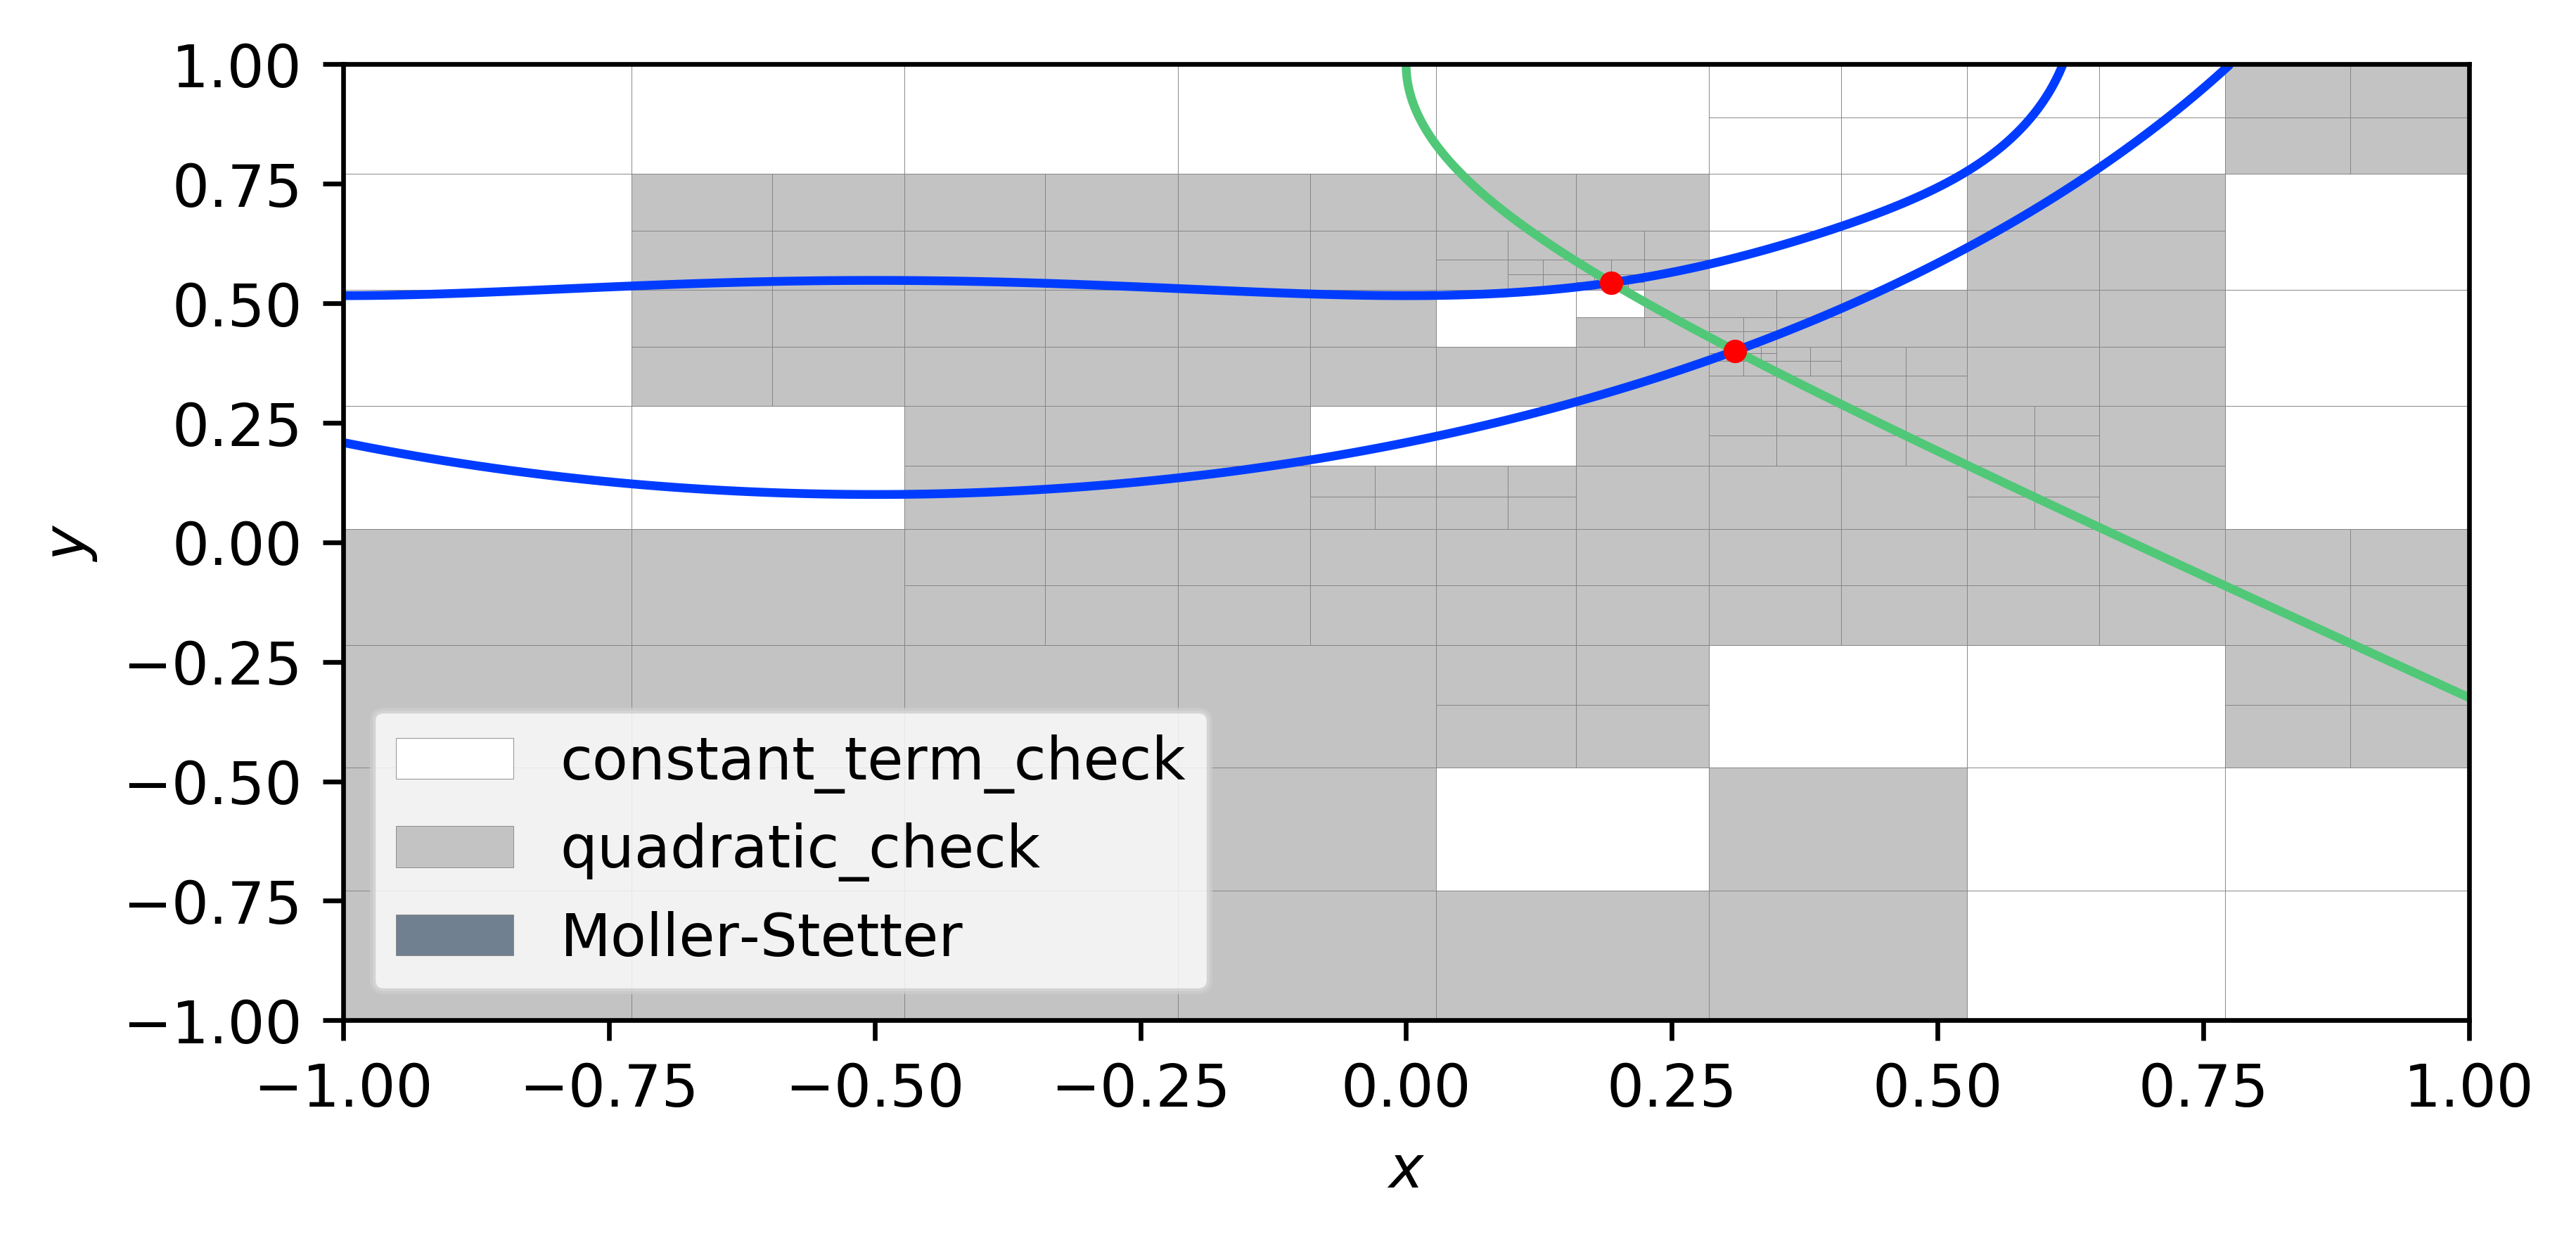

In [10]:
yroots = yr.solve([f,g], [-1,-1], [1,1], plot=True, plot_intervals=True, check_eval_error=False)

# Higher Dimensional Examples

In [11]:
#define the functions and the search domain
f = lambda x,y,z : np.sin(5*x+y+z)
g = lambda x,y,z : np.sin(x*y*z)
h = lambda x,y,z : x**2+y**2-z**2-1
a = -np.ones(3)
b = np.ones(3)

#solve and time
%time roots = yr.solve([f,g,h], a, b, check_eval_error=False)
#show the number of roots and maximal residuals
roots.shape[0],np.max(np.abs(f(*[roots[:,i] for i in range(3)]))),np.max(np.abs(g(*[roots[:,i] for i in range(3)]))),np.max(np.abs(h(*[roots[:,i] for i in range(3)])))

Percent Finished: 100%                                                  
Total intervals checked was 34301
Methods used were ['constant_term_check', 'quadratic_check', 'Base Case', 'Moller-Stetter', 'Too Deep']
The percent solved by each was [9.55016e+01 4.46630e+00 3.21000e-02 0.00000e+00 0.00000e+00]
CPU times: user 37.4 s, sys: 141 ms, total: 37.5 s
Wall time: 34.2 s


(6, 3.216245299353273e-16, 4.701557466118907e-14, 1.0835776720341528e-13)

(-1, 1)

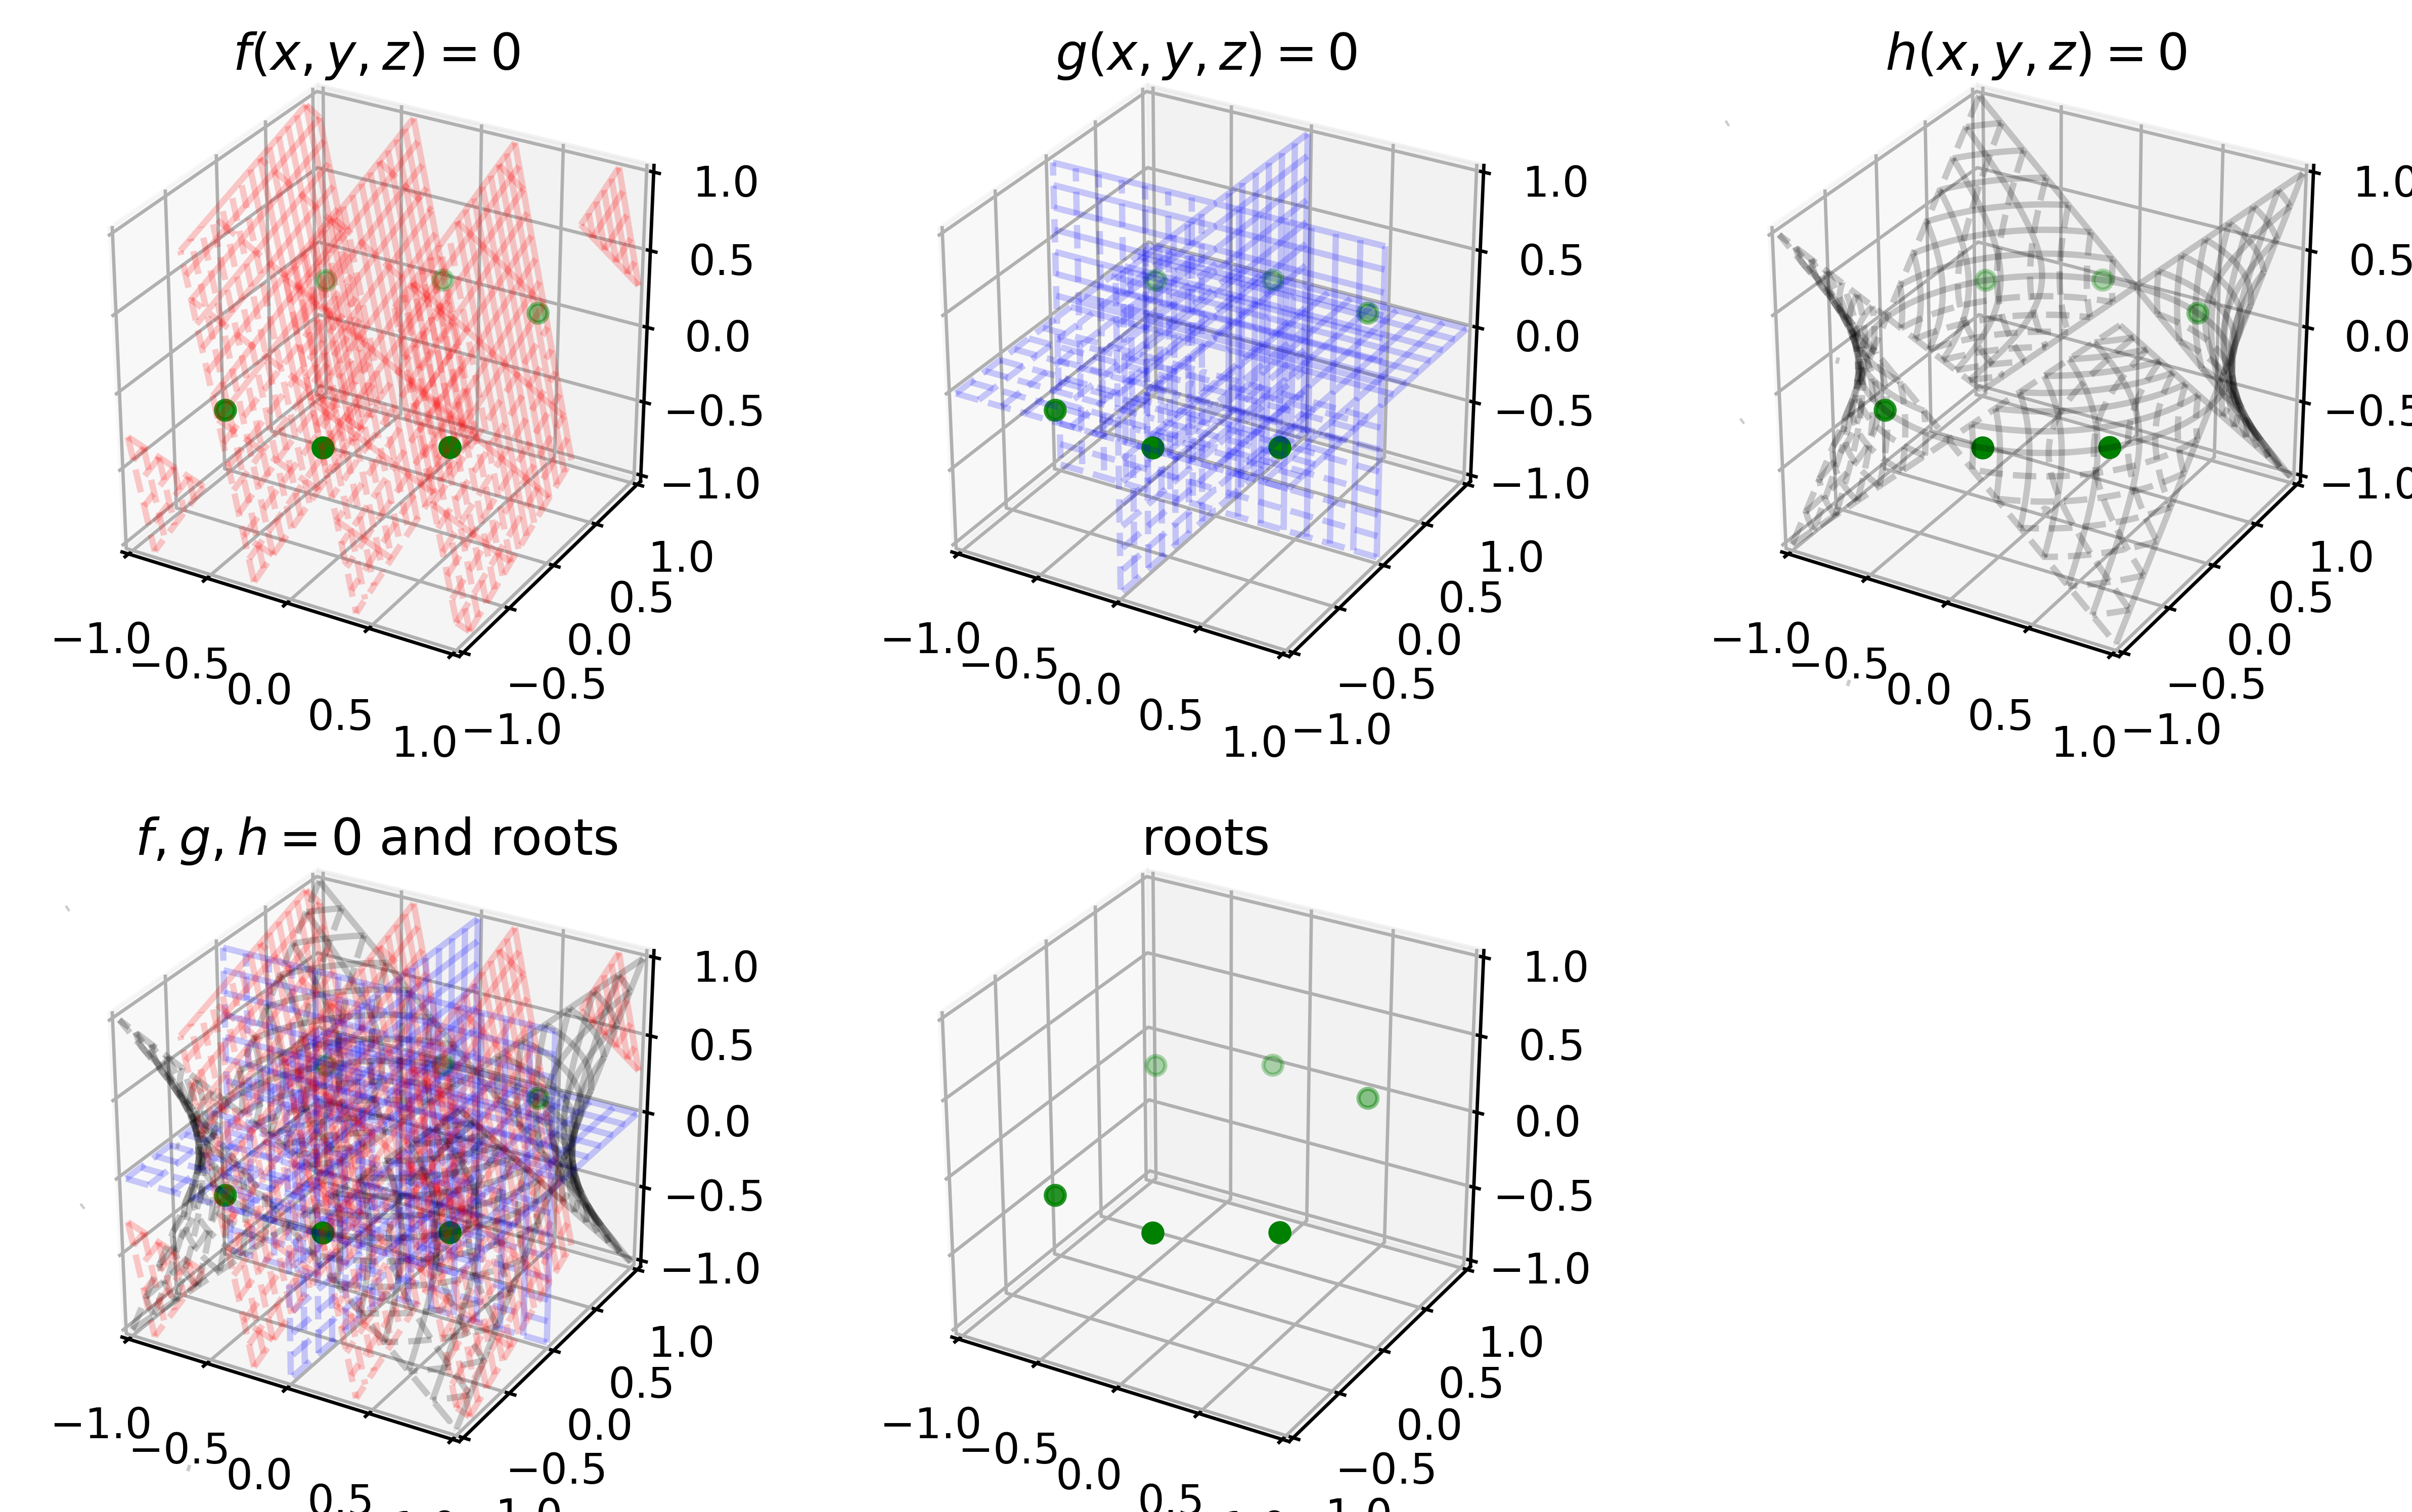

In [12]:
#function for plotting level surfaces in 3D
def plot_implicit(fn, color, bbox=(-1,1)):
    ''' create a plot of an implicit function
    fn  ...implicit function (plot where fn==0)
    bbox ..the x,y,and z limits of plotted interval'''
    xmin, xmax, ymin, ymax, zmin, zmax = bbox*3
    A = np.linspace(xmin, xmax, 100) # resolution of the contour
    B = np.linspace(xmin, xmax, 15) # number of slices
    A1,A2 = np.meshgrid(A,A) # grid on which the contour is plotted

    for z in B: # plot contours in the XY plane
        X,Y = A1,A2
        Z = fn(X,Y,z)
        cset = ax.contour(X, Y, Z+z, [z], colors=color,alpha=.2,zdir='z')
        # [z] defines the only level to plot for this contour for this value of z

    for y in B: # plot contours in the XZ plane
        X,Z = A1,A2
        Y = fn(X,y,Z)
        cset = ax.contour(X, Y+y, Z, [y], colors=color,alpha=.2,zdir='y')

    for x in B: # plot contours in the YZ plane
        Y,Z = A1,A2
        X = fn(x,Y,Z)
        cset = ax.contour(X+x, Y, Z, [x], colors=color,alpha=.2,zdir='x')

    #set plot limits
    ax.set_zlim3d(zmin,zmax)
    ax.set_xlim3d(xmin,xmax)
    ax.set_ylim3d(ymin,ymax)
    
#plot each level surface individually, then together

#f
fig = plt.figure(figsize=(10,20))
ax = fig.add_subplot(631, projection='3d')
ax.scatter(*[roots[:,i] for i in range(3)],color='g')
plot_implicit(f,'r')
ax.set_title('$f(x,y,z)=0$')

#g
ax = fig.add_subplot(632, projection='3d')
ax.scatter(*[roots[:,i] for i in range(3)],color='g')
plot_implicit(g,'b')
ax.set_title('$g(x,y,z)=0$')

#h
ax = fig.add_subplot(633, projection='3d')
ax.scatter(*[roots[:,i] for i in range(3)],color='g')
plot_implicit(h,'k')
ax.set_title('$h(x,y,z)=0$')

#together
ax = fig.add_subplot(634, projection='3d')
ax.scatter(*[roots[:,i] for i in range(3)],color='g')
plot_implicit(f,'r')
plot_implicit(g,'b')
plot_implicit(h,'k')
ax.set_title('$f,g,h = 0$ and roots')

#just the roots
ax = fig.add_subplot(635, projection='3d')
ax.scatter(*[roots[:,i] for i in range(3)],color='g')
ax.set_title('roots')
ax.set_zlim3d(-1,1)
ax.set_xlim3d(-1,1)
ax.set_ylim3d(-1,1)

## Four Variable Optimization?

As a final multivariate example, we solve the following system.

$$\cos(x_1) + x_4 = 1$$
$$\cos(x_2) + x_3 = 2$$
$$\cos(x_3) + x_2 = 3$$
$$\cos(x_4) + x_1 = 4$$

In [13]:
#functions
f1 = lambda x1, x2, x3, x4: np.cos(x1) + x4 - 1
f2 = lambda x1, x2, x3, x4: np.cos(x2) + x3 - 2
f3 = lambda x1, x2, x3, x4: np.cos(x3) + x2 - 3
f4 = lambda x1, x2, x3, x4: np.cos(x4) + x1 - 4

#domain
a = [4,3.5,2,1.5]
b = [4.5,4,3,2]

#solve and time
%time roots = yr.solve([f1,f2,f3,f4],a,b, check_eval_error=False)
#number of roots and maximum residual
roots.shape[0],np.max([np.abs(f(*[roots[:,i] for i in range(4)])) for f in [f1,f2,f3,f4]])

Percent Finished: 100%                                                  
Total intervals checked was 58201
Methods used were ['constant_term_check', 'quadratic_check', 'Base Case', 'Moller-Stetter', 'Too Deep']
The percent solved by each was [9.8756e+01 1.2371e+00 6.9000e-03 0.0000e+00 0.0000e+00]
CPU times: user 2min 23s, sys: 340 ms, total: 2min 23s
Wall time: 2min 17s


(1, 1.5543122344752192e-13)

# Comparison to Chebfun 2D

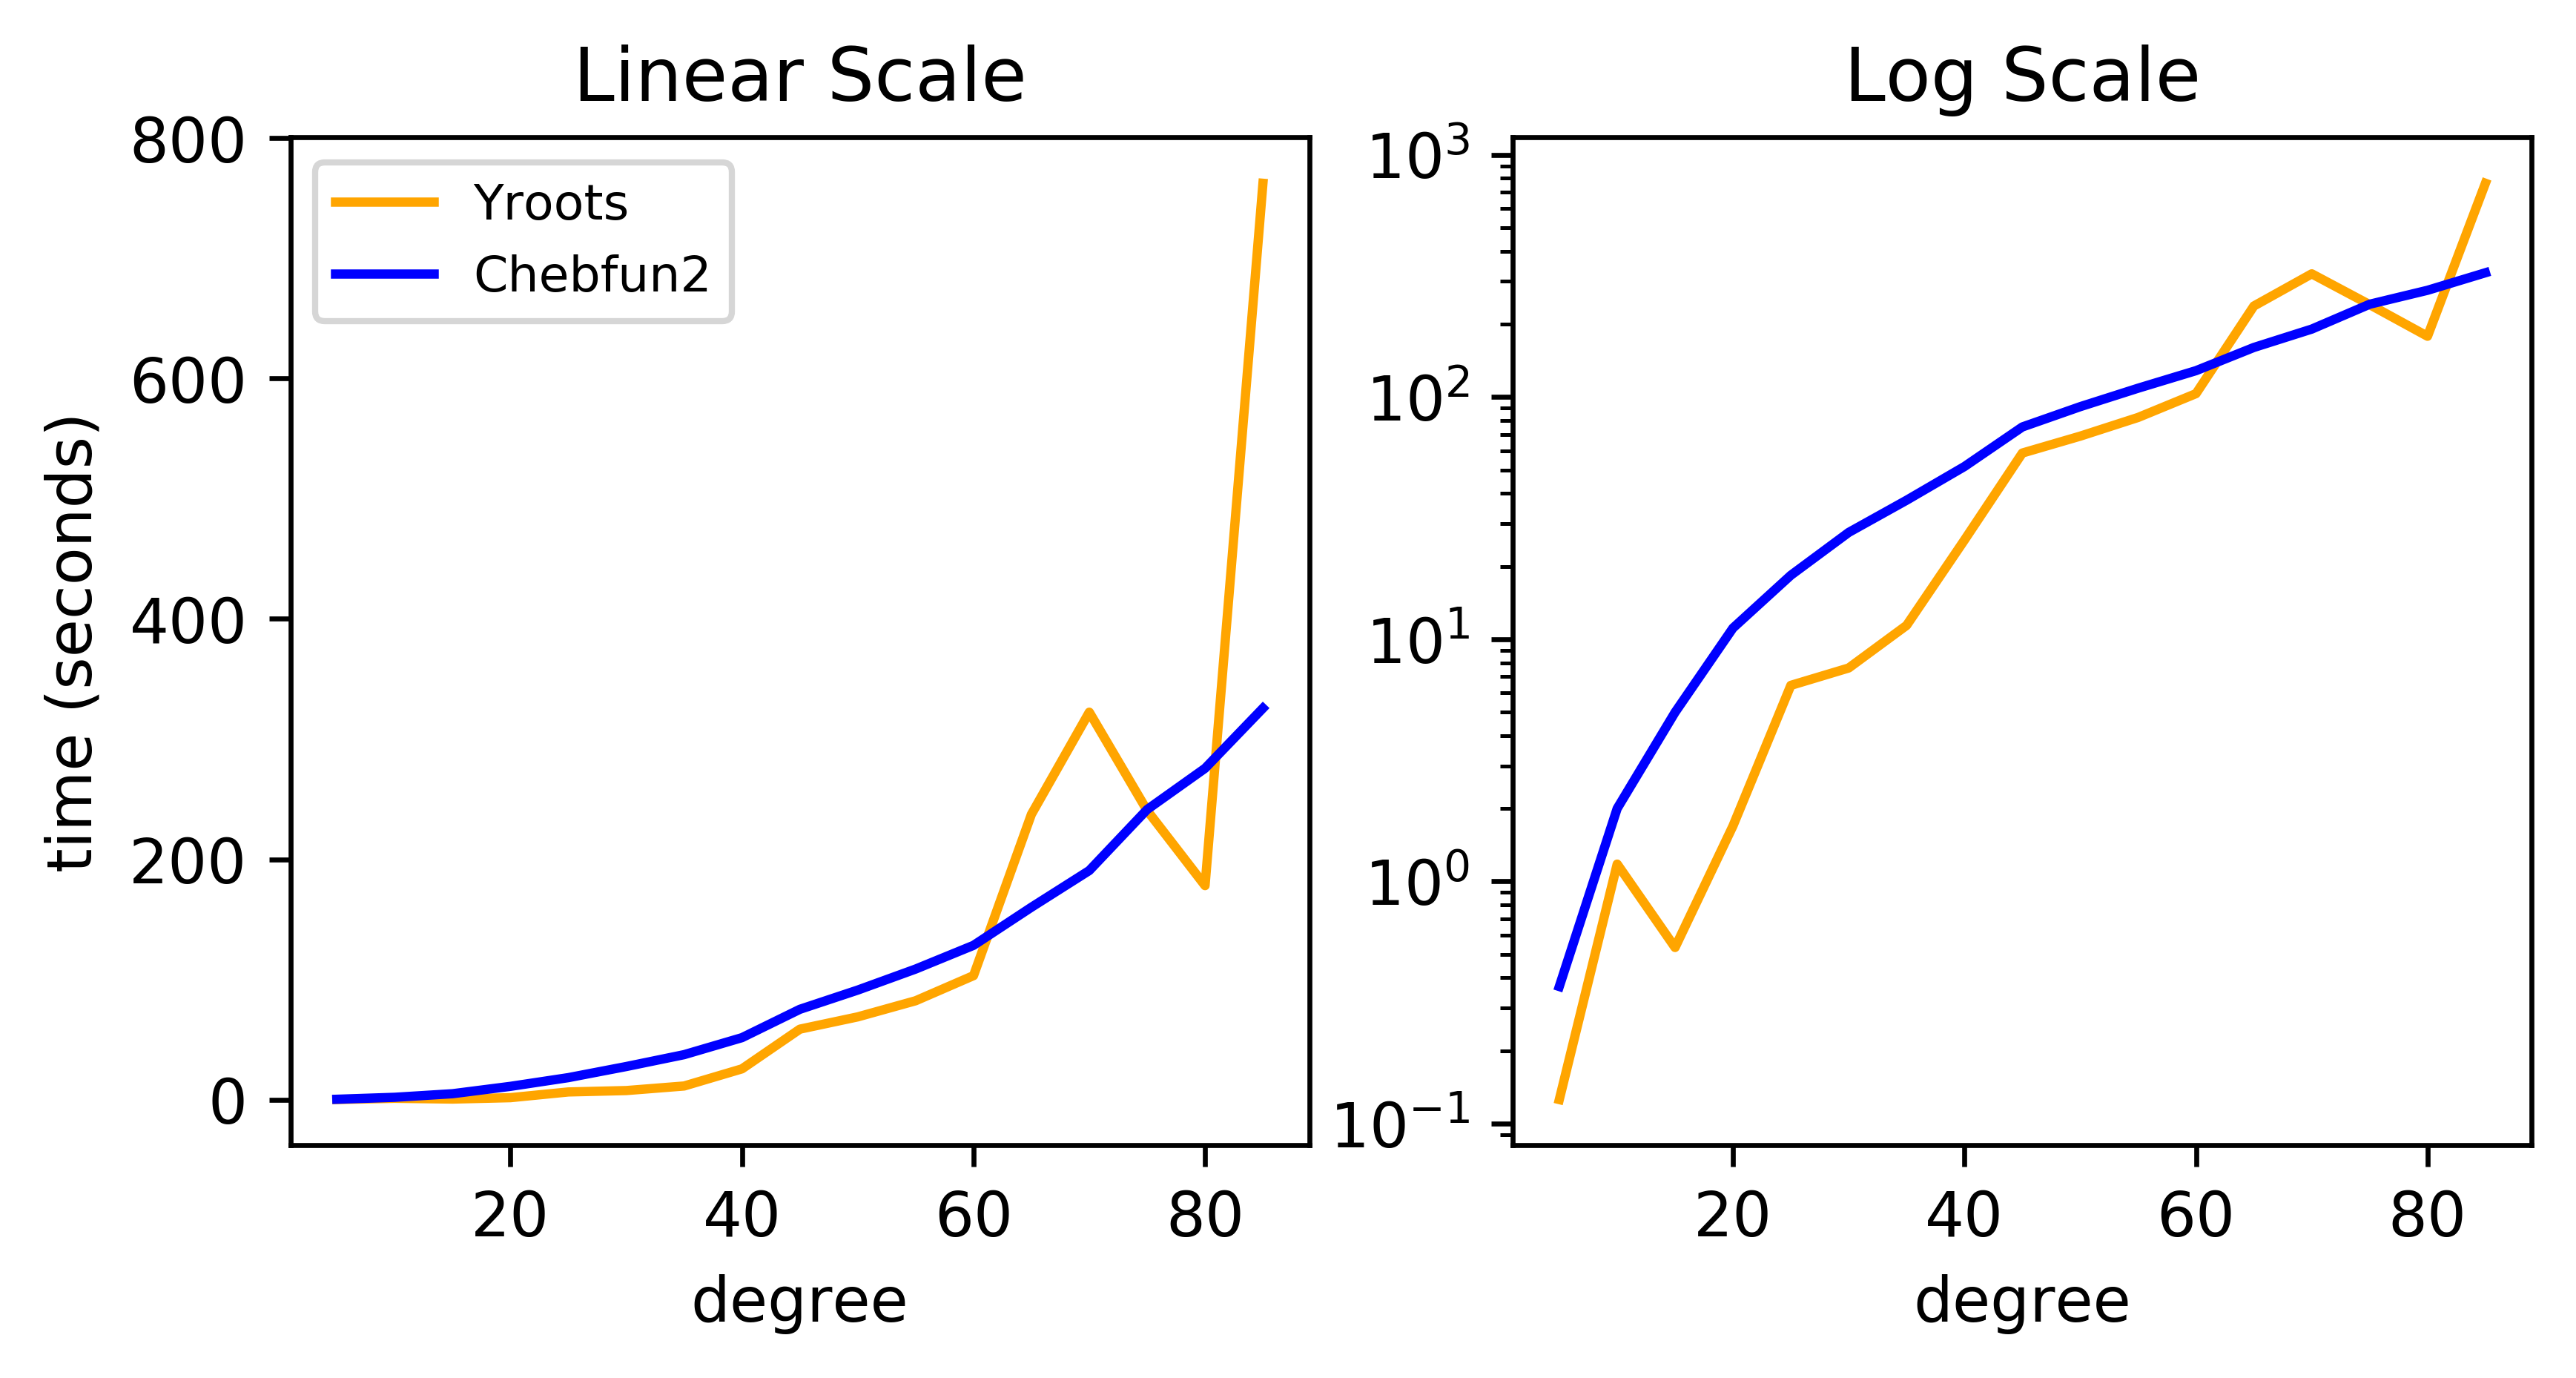

In [14]:
degree = np.arange(5,90,5)

Bezout = np.array([0.3684,2.0006,4.9907,11.1173,18.3624,27.5945,37.4742,51.6286,75.2009,91.1994,108.6904,128.4066,160.0933,190.6374,241.4105,275.662,325.6564])

fig, axes = plt.subplots(1,2)

ax1 = axes[0]

yroots = [0.12580389976501466,1.1793901920318604,0.5338900089263916,1.6945396423339845,6.448462677001953,7.60733380317688,11.403414535522462,25.674292373657227,58.686120653152464,68.91053943634033,82.31290097236634,103.21446270942688,237.39841260910035,322.3447566509247,240.52134790420533,178.08139443397522,762.3295471668243]

ax1.plot(degree, yroots, color='orange', label='Yroots')
ax1.plot(degree, Bezout, color='b', label='Chebfun2')
#ax1.plot(degree, Bezout_red_tol, color='r', label='Chebfun2 - Matched tols')


#fig.set_size_inches(6.5,4.875)

ax1.set_title('Linear Scale')
ax1.legend(loc='upper left', prop={'size': 8})
ax1.set_xlabel('degree')
ax1.set_ylabel('time (seconds)')

ax2 = axes[1]

ax2.plot(degree, yroots, color='orange', label='Yroots')
ax2.plot(degree, Bezout, color='b', label='Chebfun2')
#ax2.plot(degree, Bezout_red_tol, color='r', label='Chebfun2 - Reduced tols')

ax2.set_title('Log Scale')
ax2.set_xlabel('degree')
ax2.set_yscale('log')
#plt.savefig('chebfun2_compare.pdf')#, bbox_inches='tight', dpi=300) 

plt.show()

<font size='6.5'> Future Work </font>
<font size='5.5'> 
<ul>
<li style="margin-bottom:15px;"> Eigenvectors v.s eigenvalues </li> 
<li style="margin-bottom:15px;"> More optimized RREF for choice of basis</li> 
<li style="margin-bottom:15px;"> More Interval Checks</li> 
<li style="margin-bottom:15px;"> Checkout our Github: <a href='https://github.com/tylerjarvis/rootfinding'>https://github.com/tylerjarvis/rootfinding</a></li> 
</ul>
    
<font color=#FFFFF> <ul>
<li style="margin-bottom:15px;"> Eigenvectors v.s eigenvalues </li> 
<li style="margin-bottom:15px;"> More optimized RREF for choice of basis</li> 
<li style="margin-bottom:15px;"> More Interval Checks</li> 
<li style="margin-bottom:15px;"> Checkout our Github</li> 
</ul></font>
</font>